In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
plt.style.use('ggplot')
from sympy import *
from matplotlib import cm
%matplotlib inline

In [2]:
from life_model import LifeModel

Запустим симуляцию с хорошими параметрами и построим зависимость числа жертв/хищников от времени

In [3]:
%%time
lm = LifeModel(probability_predator_move=0.3, probability_victim_move=0.25, time_to_death=20,
               probability_predator_cell=0.01, probability_wall_cell=0, probability_victim_cell=0.5,
               time_to_reproduction_victims=10, time_to_reproduction_predators=40, row_number=20,
               column_number=40, random_state=1, visualisation_pause=0)
t = 5000
vict = np.zeros(t)
pred = np.zeros(t)
victim = 1
predator = 2
for step in range(t):
    lm.generate_next_turn()
    vict[step] = lm.life_counter[victim]
    pred[step] = lm.life_counter[predator]

CPU times: user 22.9 s, sys: 155 ms, total: 23.1 s
Wall time: 23.6 s


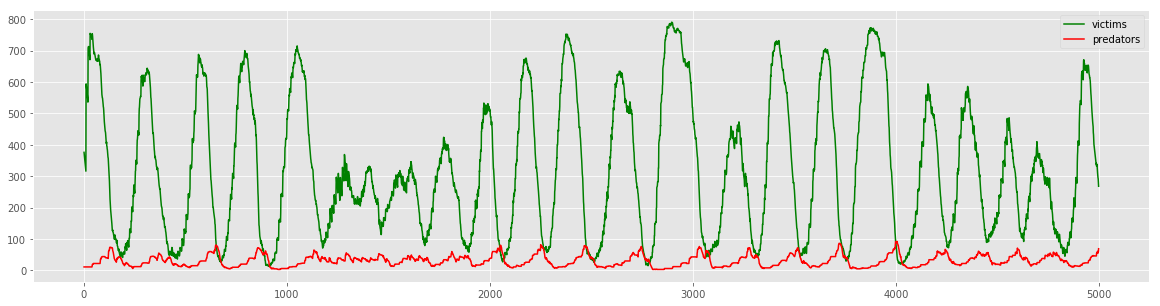

In [4]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(t),vict,'green',label='victims')
plt.plot(np.arange(t),pred,'red',label='predators')
plt.legend(loc='best')
plt.show()

Как видно гипотеза о переодичности популяций выполняется.

Для наглядности отнормируем данные:

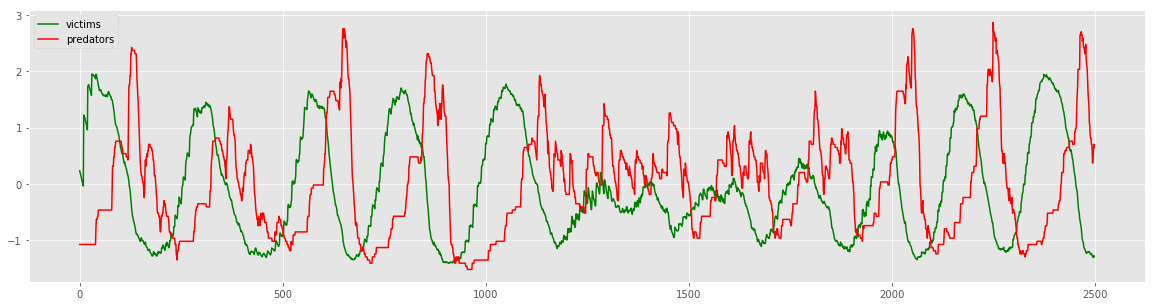

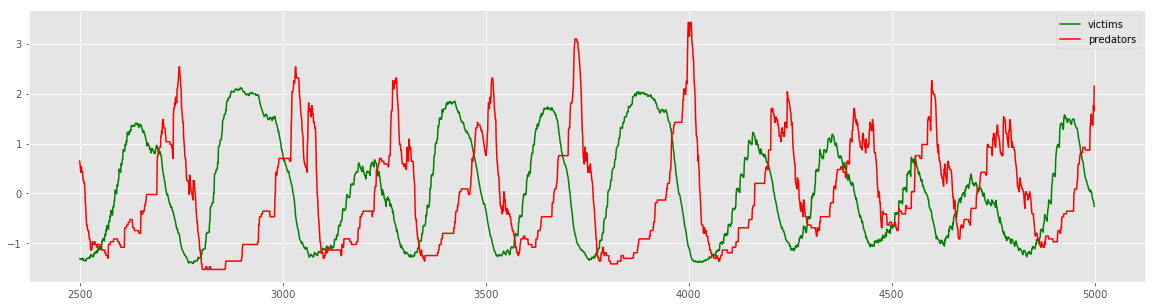

In [5]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(t//2),((vict - np.mean(vict)) / np.std(vict))[:t//2],'green',label='victims')
plt.plot(np.arange(t//2),((pred - np.mean(pred))/ np.std(pred))[:t//2],'red',label='predators')
plt.legend(loc='best')
plt.show()
plt.figure(figsize=(20,5))
plt.plot(np.arange(t//2,t),((vict - np.mean(vict)) / np.std(vict))[t//2:t],'green',label='victims')
plt.plot(np.arange(t//2,t),((pred - np.mean(pred))/ np.std(pred))[t//2:t],'red',label='predators')
plt.legend(loc='best')
plt.show()

У хищников также стабильно видны минипериоды на фоне главного тренда. Скорее всего это связано с геометрией поля.

Для запуска из консоли с визуализацией и хорошими параметрами:

python3 life_model.py visualize=1 probability_predator_move=0.3 probability_victim_move=0.25 time_to_death=20 probability_predator_cell=0.01 probability_wall_cell=0 probability_victim_cell=0.5 time_to_reproduction_victims=10 time_to_reproduction_predators=40 row_number=20 column_number=40 random_state=1 t=10000  visualisation_pause=0